# K Means Clustering

K Means Clustering is an unsupervised learning algorithm which groups the unlabeled dataset into different clusters. Here, K denotes the number of clusters that need to be created in the process.

In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

Steps of a K Means clustering algorithm

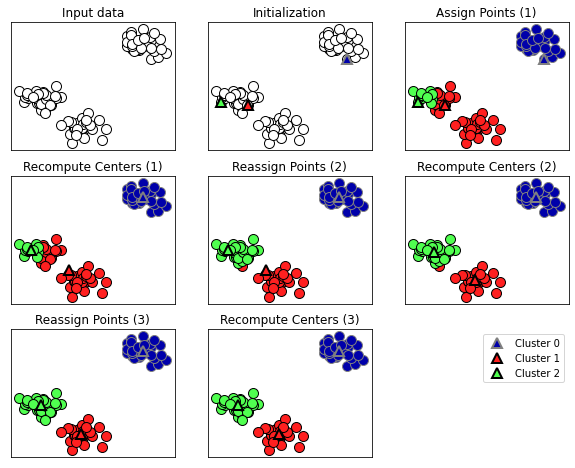

In [2]:
mglearn.plots.plot_kmeans_algorithm()

First, initialization takes place where randonly 3 points are selected and marked as cluster centres. After this, the points are alloted to its data center. After this the data center updates itself and assign itself the mean of updated points. This process repeats two times after which the center does not change and the algorithm stops.

It has the following three steps :
- Initialization - Randomly 3 points are selected and marked as cluster centers.
- Assigning - The points closest to a cluster centre are assigned those clusters. 
- Computation - The cluster centres are found again and readjusted and the process repeats from assigning.

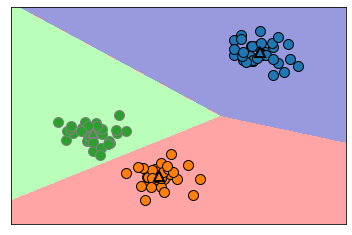

In [3]:
mglearn.plots.plot_kmeans_boundaries()

##### Applying K Means clustering on make_blobs() dataset

In [4]:
x, y = make_blobs(random_state=1)

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [6]:
print("\nCluster labels {}".format(kmeans.labels_))

## During the fitting of data in KMeans, the clustering takes place and each x value is assigned a label. Here, we asked for 3 labels so we got the labels as 0, 1 and 2.


Cluster labels [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [7]:
# print(kmeans.predict(x))

## predict() method is used to assign cluster labels to new points (for testing purposes). Here, since the labels_ and predict(x) give the same result.

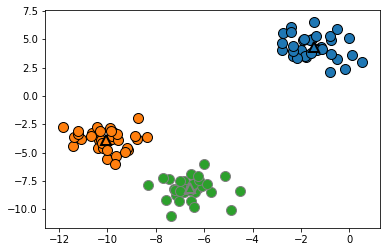

In [8]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                        kmeans.cluster_centers_[:, 1], [0, 1, 2],
                        markers='^', markeredgewidth=2)

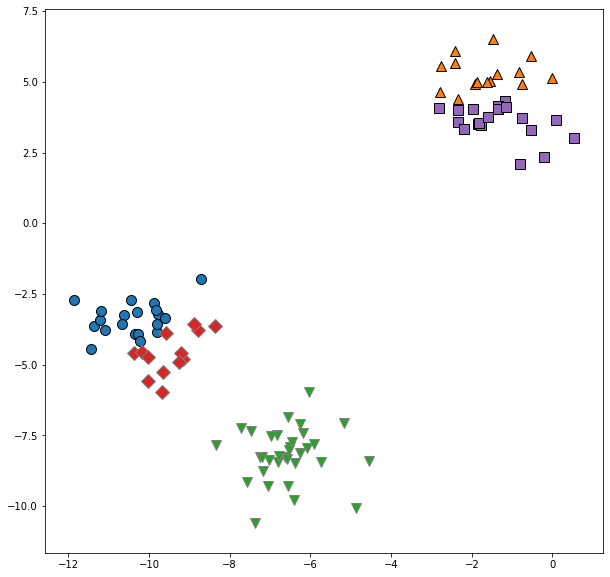

In [9]:
# Using 5 cluster centres

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
assignments = kmeans.labels_

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes)

#### Elbow plot using distortions

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


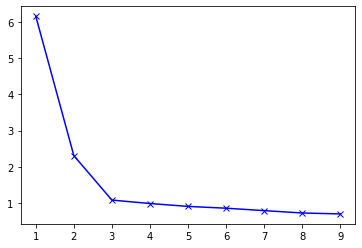

In [10]:
K = range(1, 10)
distortions = []

for k in K:
    kmodel = KMeans(n_clusters=k).fit(x)
    kmodel.fit(x)
    
    distortions.append(sum(np.min(cdist(x, kmodel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
plt.plot(K, distortions, 'bx-')
plt.show()

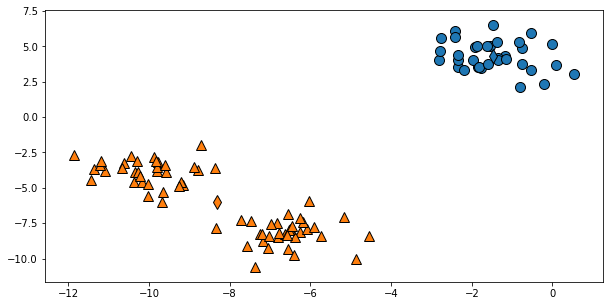

In [11]:
# Using 2 cluster centers 

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
assignments = kmeans.labels_

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes)
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1], markers='d')

#### Failure of k-means

Text(0, 0.5, 'Feature 1')

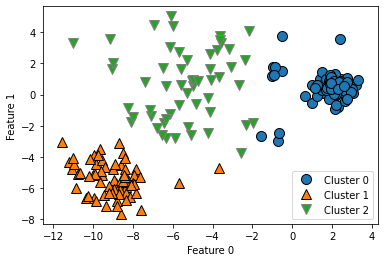

In [12]:
x_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x_varied)
mglearn.discrete_scatter(x_varied[:, 0], x_varied[:, 1], y_pred) 
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Here, the "green" cluster is not a separate cluster, rather some points from Cluster 0 and 1 reach out to the centre and make up the Cluster 2

import numpy as npA major assumption with K Means is that all the directions are equally important. If the groups of data are strechted towards a certain direction, then K Means will fail as it will only consider the distance from the center and will include points from other clusters.

Text(0, 0.5, 'Feature 1')

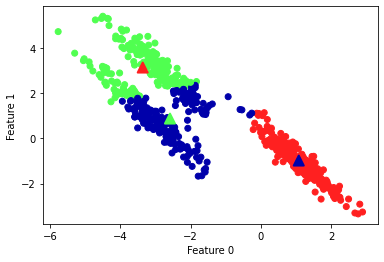

In [13]:
## Generate some random cluster data
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

## Transform the data to be stretched 

transformation = rng.normal(size=(2, 2))
x = np.dot(x, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           marker='^', c=[2, 0, 1], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Here, the diagonal data belongs to the same class, however, K Means clustering failed to classify them as it considers the distances from the centers irrespective of the axis. In other words, it fails to identify non-spherical data.

Text(0, 0.5, 'Feature 1')

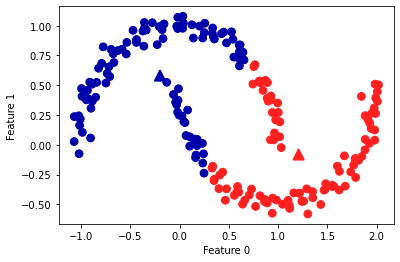

In [14]:
## K Means also performs poorly for complex shapes like the two moons dataset

x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], 
           s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Here, the K Means Clustering cannot identify the two moons separately.

### K Means as decomposition (Vector quantization)

Vector quantization is defined as the process of representing each data point of a cluster using its cluster center. 

C:\Users\eshub\AppData\Local\Temp\ipykernel_21140\202240697.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


[[0.6797385  0.6653595  0.6562091  ... 0.24705882 0.24052288 0.2379085 ]
 [0.24575163 0.21830066 0.18039216 ... 0.54509807 0.54509807 0.5346405 ]
 [0.02614379 0.02352941 0.02745098 ... 0.27973858 0.27973858 0.3137255 ]
 ...
 [0.36732024 0.4130719  0.44705883 ... 0.9490196  0.95816994 0.96732026]
 [0.63660127 0.6614379  0.6797385  ... 0.5464052  0.15032679 0.08235294]
 [0.0627451  0.07320261 0.11111111 ... 0.1633987  0.17908497 0.19477125]]


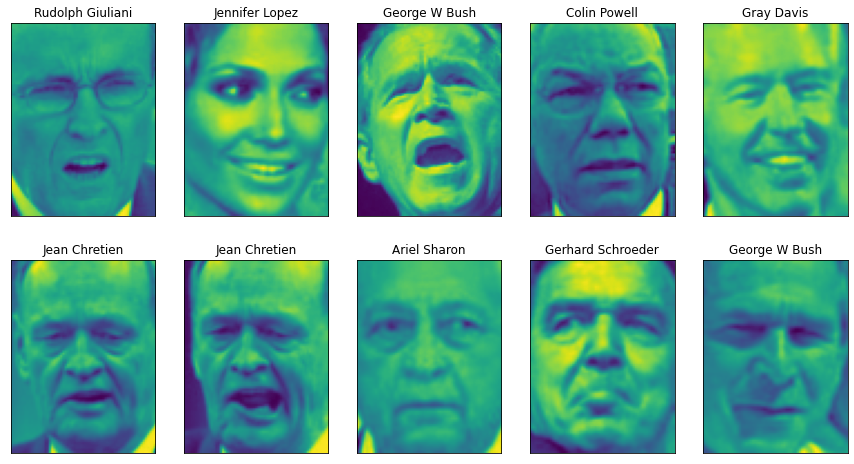

In [15]:
## Let us compare PCA, NMF and k-Means by showing the components extracted 
## by different methods on faces. 

## Fetching the faces by using the same method as used in NMF and PCA. 

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # Taking 50 images of each person
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# Dividing by 255 so that each value lies between 0 and 1

X_people = X_people / 255
print(X_people)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)

# Fitting faces in NMF

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

# Fitting faces in PCA

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

# Fitting faces in KMeans

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF')

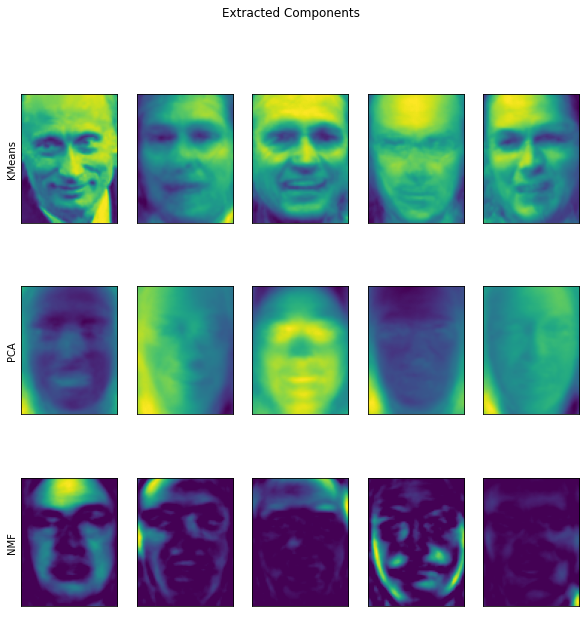

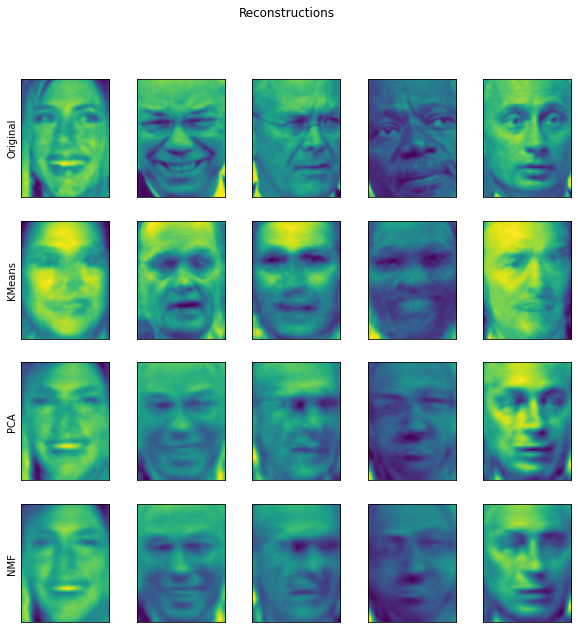

In [17]:
## Plotting extracted components and reconstructions 

fig, axes = plt.subplots(3, 5, figsize=(10, 10),
subplot_kw={'xticks': (), 'yticks': ()})

fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("KMeans")
axes[1, 0].set_ylabel("PCA")
axes[2, 0].set_ylabel("NMF")


fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 10))
fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, 
                                                  X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("KMeans")
axes[2, 0].set_ylabel("PCA")
axes[3, 0].set_ylabel("NMF")

Below we use KMeans on the two_moons dataset and find that using 10 clusters instead of 2 we can actually separate the 2 moons 
now using a simple regression model and can even find expressive information about the dataset. 

Cluster memberships:
[3 9 5 0 9 9 3 1 3 1 2 7 9 1 6 3 8 7 8 6 4 1 8 1 2 5 9 4 5 2 3 2 1 5 8 4 7
 3 6 5 7 2 8 5 9 2 3 6 5 1 6 7 4 0 1 8 8 1 8 2 7 0 9 3 1 0 2 9 2 0 7 0 7 5
 7 0 5 3 8 7 4 2 7 4 5 2 3 2 7 4 8 3 4 6 4 9 9 7 0 5 1 4 2 3 0 5 0 2 9 8 6
 2 2 0 3 1 8 4 7 3 3 6 5 2 5 6 3 5 1 4 3 6 0 5 1 9 1 0 4 3 5 5 8 2 2 3 5 1
 8 5 7 9 3 8 7 2 1 7 8 8 5 1 8 9 7 9 8 7 9 1 8 0 6 6 5 1 4 6 6 8 9 6 4 9 4
 8 2 7 0 6 0 8 3 3 5 6 4 5 2 9]


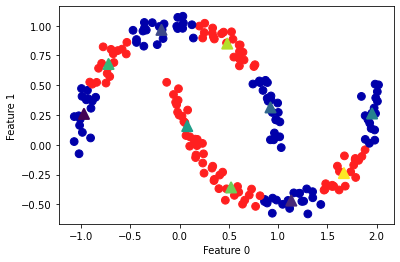

In [18]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=range(kmeans.n_clusters), 
           s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))